In [19]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
from sklearn.svm import SVC 
from sklearn.neural_network import  MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import brier_score_loss 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import log_loss 
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
import seaborn as sns 
import matplotlib.pyplot as plt 


In [20]:
pd.set_option("display.max_columns", None) 
tourney_games = pd.read_csv("../data/modeling/tourney_ml.csv")
tourney_games = pd.get_dummies(tourney_games, columns=['Seed_1', 'Seed_2'], prefix=['T1_Seed','T2_Seed'], dtype=int)
tourney_games 

x = tourney_games.drop(columns=['Season', 'DayNum', 'Team1', 'Team2', 'Team1_Wins', 'ConfAbbrev_1', 'ConfAbbrev_2', 
                     'Threes_Per_Game_1', 'Threes_Per_Game_2', 'Free_Throws_Per_Game_1', 'Free_Throws_Per_Game_2'])

y = tourney_games['Team1_Wins']
x

,Win_Percentage_1,Points_Per_Game_1,FG_Percentage_1,Three_Point_Percentage_1,Free_Throw_Percentage_1,Offensive_Rebound_Rate_1,Defensive_Rebound_Rate_1,Turnovers_Per_Game_1,Opp_FG_Percentage_1,Opp_Three_Point_Percentage_1,Opp_Free_Throws_Per_Game_1,Opp_Turnovers_Per_Game_1,Win_pct_last_10_games_1,SRS_1,SOS_1,Pace_1,FTr_1,3PAr_1,offensiveRating_1,defensiveRating_1,Win_Percentage_2,Points_Per_Game_2,FG_Percentage_2,Three_Point_Percentage_2,Free_Throw_Percentage_2,Offensive_Rebound_Rate_2,Defensive_Rebound_Rate_2,Turnovers_Per_Game_2,Opp_FG_Percentage_2,Opp_Three_Point_Percentage_2,Opp_Free_Throws_Per_Game_2,Opp_Turnovers_Per_Game_2,Win_pct_last_10_games_2,SRS_2,SOS_2,Pace_2,FTr_2,3PAr_2,offensiveRating_2,defensiveRating_2,T1_Seed_1,T1_Seed_2,T1_Seed_3,T1_Seed_4,T1_Seed_5,T1_Seed_6,T1_Seed_7,T1_Seed_8,T1_Seed_9,T1_Seed_10,T1_Seed_11,T1_Seed_12,T1_Seed_13,T1_Seed_14,T1_Seed_15,T1_Seed_16,T2_Seed_1,T2_Seed_2,T2_Seed_3,T2_Seed_4,T2_Seed_5,T2_Seed_6,T2_Seed_7,T2_Seed_8,T2_Seed_9,T2_Seed_10,T2_Seed_11,T2_Seed_12,T2_Seed_13,T2_Seed_14,T2_Seed_15,T2_Seed_16
0,0.562500,66.031250,43.914373,36.426914,74.820144,32.387476,70.905764,12.625000,41.863140,35.247209,15.843750,11.968750,0.7,-3.31,-5.22,63.1,0.420,0.261,110.7,110.2,0.500000,76.250000,44.068706,35.633626,74.063401,28.345070,66.855524,12.000000,49.312896,33.626374,20.312500,13.281250,0.6,-6.32,-4.44,70.0,0.367,0.434,112.5,112.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.617647,70.794118,45.865434,30.278884,66.149506,34.790060,63.735343,10.411765,42.438765,31.951641,23.794118,11.529412,0.5,9.02,7.44,64.9,0.370,0.255,111.1,110.9,0.636364,72.212121,47.130919,35.390947,68.832891,34.105653,71.216098,12.363636,42.714127,35.394127,21.696970,11.272727,0.5,11.84,8.14,65.7,0.416,0.270,111.6,110.9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.366667,62.000000,40.371517,33.509700,68.667917,30.842912,66.953714,8.966667,43.837442,33.978495,21.466667,10.833333,0.5,-1.34,1.69,60.8,0.326,0.354,110.2,110.9,0.562500,75.062500,45.821326,35.879218,71.095571,33.456905,68.924640,13.218750,44.632768,35.528596,17.906250,10.843750,0.9,-8.41,-10.07,68.2,0.491,0.325,111.9,112.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.625000,70.500000,44.249292,32.962963,70.781893,39.692586,72.423146,10.875000,41.238318,34.047109,17.687500,10.843750,0.6,17.34,7.84,62.8,0.416,0.308,112.2,109.1,0.625000,82.000000,46.469367,35.283019,73.272933,38.107639,71.063479,11.375000,41.401274,31.954351,20.500000,13.468750,0.3,18.58,7.43,69.8,0.453,0.275,113.3,110.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.764706,71.852941,44.835046,38.720000,76.050420,31.238616,66.563467,11.676471,38.733126,32.894737,20.088235,12.911765,0.7,17.23,8.63,65.5,0.383,0.343,111.4,107.7,0.727273,71.272727,46.858790,38.028169,64.143426,29.488372,72.393661,12.333333,41.842105,33.742331,17.636364,10.151515,0.8,9.05,5.08,66.0,0.436,0.369,111.4,110.2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.750000,79.843750,48.179420,37.711864,72.187500,29.538462,76.019417,9.375000,43.244710,32.568807,15.906250,10.906250,0.7,20.67,8.36,67.1,0.343,0.375,121.8,95.5,0.611111,76.361111,44.920273,34.604905,73.352034,27.121464,73.570191,9.222222,44.365193,34.905660,18.666667,11.555556,0.6,12.81,8.93,68.5,0.320,0.333,114.5,100.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1334,0.750000,79.468750,44.433198,34.191176,74.926254,31.881372,73.063063,9.968750,38.930481,31.395349,20.906250,12.500000,0.7,21.81,10.42,70.3,0.337,0.412,117.3,90.6,0.878788,83.393939,48.832382,40.801187,72.121212,36.954315,76.721883,10.969697,41.888620,31.380208,14.393939,9.515152,0.8,24.

In [28]:
# Train the model 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=57)

# Scaled the continuous columns 
scaled_columns = [col for col in x.columns if 'seed' not in col.lower()]

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scaled_columns),  # Scale selected columns
        ('passthrough', 'passthrough', [col for col in x.columns if 'seed' in col.lower()])  # Leave seed columns unchanged
    ])

# Step 4: Transform both training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Train and evaluate the model
base_model = LogisticRegression(max_iter=100000000) 
base_model = joblib.load("reg_season.pkl")
#base_model.set_params(learning_rate=0.01 )
base_model.fit(X_train_transformed, y_train)

/Users/alexreid/Desktop/Projects/March_ML_Mania_2025/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

Brier Score: 0.1738
Accuracy: 0.7425
Log Loss: 0.5163
ROC-AUC Score: 0.8198


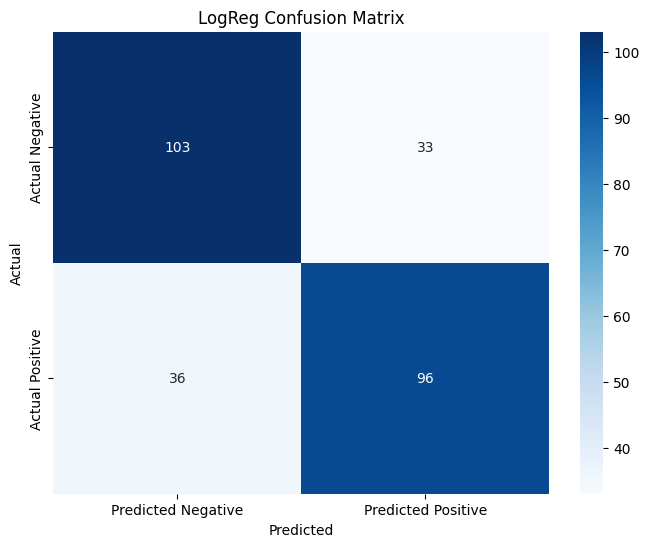

In [24]:
# Make predictions on the test set
y_pred = base_model.predict(X_test_transformed)
y_pred_probs = base_model.predict_proba(X_test_transformed)[:, 1]

brier = brier_score_loss(y_test, y_pred_probs)
print(f'Brier Score: {brier:.4f}')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.4f}')

auc = roc_auc_score(y_test, y_pred_probs)
print(f'ROC-AUC Score: {auc:.4f}')

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LogReg Confusion Matrix')
plt.show()

In [17]:
X_train_scaled

array([[-0.45728122, -0.39585938,  0.2674495 , ..., -0.19706586,
        -0.19188983, -0.27454851],
       [ 0.51704865, -0.18414662,  0.14428215, ..., -0.19706586,
        -0.19188983, -0.27454851],
       [ 0.27346618,  0.09107996,  0.3418223 , ..., -0.19706586,
        -0.19188983, -0.27454851],
       ...,
       [ 0.44745366,  0.86509173, -0.09001728, ...,  5.07444578,
        -0.19188983, -0.27454851],
       [-1.65996966,  0.19936222, -0.12229733, ..., -0.19706586,
        -0.19188983, -0.27454851],
       [-0.62474417,  0.45804875,  0.20750436, ..., -0.19706586,
        -0.19188983, -0.27454851]], shape=(1070, 72))